In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

import numpy as np
import pandas as pd
import plotly.express as px
import tensorflow as tf
from tqdm.keras import TqdmCallback

import nusynth.ansatz as a
import nusynth.circuit as c
import nusynth.utils as u

In [3]:
U, S = pickle.load(open('data/u2s_3q_2000.pickle', 'rb'))

In [4]:
P_u3 = np.random.uniform(low=0, high=2 * np.pi, size=(2000, 9))
P_su2_r1 = np.random.uniform(low=0, high=2 * np.pi, size=(2000, 12))
P_su2_r3 = np.random.uniform(low=0, high=2 * np.pi, size=(2000, 24))
# P_su2_r5 = np.random.uniform(low=0, high=2 * np.pi, size=(2000, 36))
P_qgan_r1 = np.random.uniform(low=0, high=2 * np.pi, size=(10000, 6))
P_qgan_r3 = np.random.uniform(low=0, high=2 * np.pi, size=(2000, 12))

In [97]:
U_u3 = a.U3Gate_3Q().map(P_u3)
U_su2_r1 = a.SU2_3Q(1).map(P_su2_r1)
U_su2_r3 = a.SU2_3Q(3).map(P_su2_r3)
# U_su2_r5 = a.SU2_3Q(5).map(P_su2_r5)
U_qgan_r1 = a.QGAN_3Q(1).map(P_qgan_r1)
U_qgan_r3 = a.QGAN_3Q(3).map(P_qgan_r3)

U3Gate_3Q:   0%|          | 0/2000 [00:00<?, ?it/s]

SU2_3Q:   0%|          | 0/2000 [00:00<?, ?it/s]

SU2_3Q:   0%|          | 0/2000 [00:00<?, ?it/s]

QGAN_3Q:   0%|          | 0/100 [00:00<?, ?it/s]

QGAN_3Q:   0%|          | 0/2000 [00:00<?, ?it/s]

In [107]:
P_qgan_r1 = np.random.uniform(low=0, high=2 * np.pi, size=(10000, 6))
U_qgan_r1 = a.QGAN_3Q(1).map(P_qgan_r1)

QGAN_3Q:   0%|          | 0/10000 [00:00<?, ?it/s]

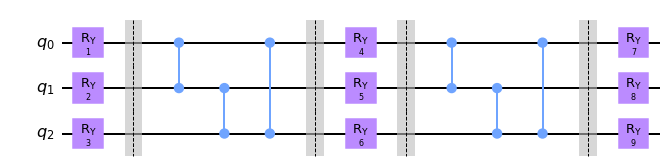

In [6]:
c.qgan_3q([1,2,3,4,5,6, 7, 8, 9], 2).draw('mpl')

In [101]:
sa = a.Squander(3, tolerance=1e-6, initial_guess='zeros', param_max=4 * np.pi, param_min=-4 * np.pi)

In [126]:
S_u3 = sa.map(U_u3)
# S_su2_r1 = sa.map(U_su2_r1)
# # S_su2_r3 = sa.map(U_su2_r3)
# # S_su2_r5 = sa.map(U_su2_r5)
# S_qgan_r1 = sa.map(U_qgan_r1)
# S_qgan_r3 = sa.map(U_qgan_r3)

Squander:   0%|          | 0/2000 [00:00<?, ?it/s]

In [109]:
np.isnan(S_qgan_r1).sum() / 77

0.0

In [127]:
np.isnan(S_u3).sum() / 77

1344.0

In [10]:
import pickle

In [110]:
pickle.dump((P_qgan_r1, U_qgan_r1, S_qgan_r1), open('qgan_P_U_S.pickle', 'wb'))

In [94]:
U_qgan_r1, S_qgan_r1 = pickle.load(open('qgan_U_S.pickle', 'rb'))

In [30]:
S_qgan_r1 = sa.map(U_u3)

Squander:   0%|          | 0/2000 [00:00<?, ?it/s]

In [116]:
S_qgan_r1.shape

(10000, 77)

In [124]:
S_u3.max()

nan

In [125]:
S_u3.min()

nan

In [119]:
# pcs_U, (pcs_u3, pcs_su2_r1, pcs_su2_r3, pcs_su2_r5) = u.pca(
#     S, [S_u3, S_su2_r1, S_su2_r3, S_su2_r5],
#     n_components=2
# )

pcs_U, (pcs_u3, pcs_qgan_r1) = u.pca(
    S, [S_u3, S_qgan_r1],
    n_components=2
)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [33]:
columns = ['pc1', 'pc2']

pcs_df_list = [
    pd.DataFrame(pcs_U, columns=columns),
    pd.DataFrame(pcs_u3, columns=columns),
#     pd.DataFrame(pcs_su2_r1, columns=columns),
#     pd.DataFrame(pcs_su2_r3, columns=columns),
#     pd.DataFrame(pcs_su2_r5, columns=columns)
    pd.DataFrame(pcs_qgan_r1, columns=columns)
]

pcs_df_list[0]['Type'] = 'Random Unitary'
pcs_df_list[1]['Type'] = 'U3 Gate'
pcs_df_list[2]['Type'] = 'QGAN 1-Layer'
# pcs_df_list[2]['Type'] = 'Eff SU2 1-Layer'
# pcs_df_list[3]['Type'] = 'Eff SU2 3-Layer'
# pcs_df_list[4]['Type'] = 'Eff SU2 5-Layer'
    

pcs_df = pd.concat(pcs_df_list, axis=0)

In [34]:
pcs_fig = px.scatter(pcs_df, x='pc1', y='pc2', color='Type', width=1200, height=1000)

In [35]:
pcs_fig

In [41]:
pcs_fig.write_html('figures/pcs.html')

In [58]:
std_df = pd.DataFrame(
    np.vstack([
        np.std(pcs_U, axis=0),
        np.std(pcs_u3, axis=0),
        np.std(pcs_su2_r1, axis=0),
        np.std(pcs_su2_r3, axis=0),
        np.std(pcs_su2_r5, axis=0)
    ]), columns=['pc1', 'pc2']
)

std_df['Type'] = ['Random Unitary', 'U3 Gate', 'Eff SU2 1-Layer', 'Eff SU2 3-Layer', 'Eff SU2 5-Layer']

In [60]:
std_fig = px.bar(
    std_df, x='Type', y=['pc1', 'pc2'], barmode='group',
    labels={
        'value': 'Standard Deviation',
        'variable': 'Component'
    }
)

In [62]:
std_fig.write_image('figures/std.png')

In [207]:
def make_model(input_size, output_size, hidden_size):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=input_size))
    model.add(tf.keras.layers.Dense(hidden_size, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(hidden_size, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(output_size, activation='linear'))
    
    model.compile(optimizer='adam', loss='huber')
    
    return model

In [217]:
def fit_model(model, X, Y):
    n_epochs = 1000
    batch_size = 100
    model.fit(X, Y, epochs=n_epochs, batch_size=batch_size, verbose=0, callbacks=[TqdmCallback(verbose=0)])

In [232]:
S_qgan_r1[0]

array([ 1.13838701e+00, -1.66338945e-03,  1.13061583e+00,  8.02013635e-04,
        8.86723162e-01,  3.31425872e-03, -5.84865415e-06, -2.78256801e-04,
       -5.16750750e-04,  3.08746441e-04, -2.34934244e-06,  2.07379637e-05,
        6.03234339e-04,  8.34513027e-04, -3.37171232e-08, -1.31746901e-05,
       -7.69180513e-03,  6.85686901e-04,  1.38185330e-03, -1.16731433e-05,
       -8.09872956e-03, -2.12809718e-03,  5.84162875e-06, -8.23979588e-06,
       -2.43199320e-05,  2.25186946e-05, -7.19540848e-08,  1.49759105e-06,
        1.58554404e-06, -6.53620101e-06,  8.29607077e-09,  9.68765820e-08,
        1.01711685e-06,  1.76088234e-05, -3.54687579e-08, -2.76188910e-07,
       -1.50282303e-06,  1.39505162e-05,  5.63409682e-09,  4.17476564e-08,
       -1.01485805e-06, -5.74646192e-07, -4.83824605e-09, -4.16598648e-08,
        2.58601414e-09, -7.55926721e-08,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [227]:
# M_U = make_model(128, 77, 256)
# M_u3 = make_model(9, 77, 256)
# M_su2_r1 = make_model(12, 77, 128)
# M_su2_r3 = make_model(24, 77, 256)
# M_su2_r5 = make_model(36, 77, 256)
M_qgan_r1 = make_model(6, 6, 64)

In [240]:
aaa, ccc = sa.forward(U_qgan_r1[0], return_circuit=True)

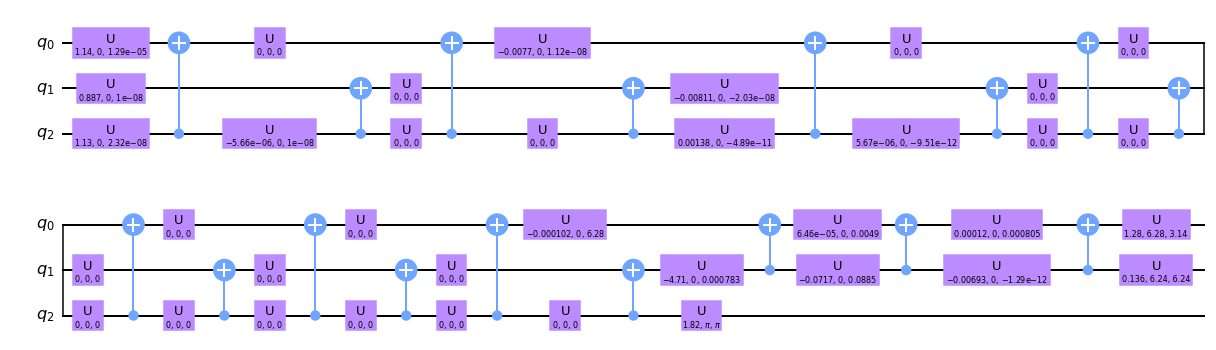

In [241]:
ccc.draw('mpl')

In [81]:
import nusynth.squander as s

In [233]:
dec = s.decompose(u.random_unitary(3), tolerance=1e-8, max_n_layers_dict={4:60, 3:14, 2:4}, verbose=True)

***************************************************************
Starting to disentangle 3-qubit matrix
***************************************************************



Disentagling submatrices.
The minimum with 14 layers after 0 iterations is 5.450179e+00 calculated in 0.001073 seconds
The minimum with 14 layers after 500 iterations is 1.285908e-01 calculated in 0.092377 seconds
The minimum with 14 layers after 1000 iterations is 2.966484e-02 calculated in 0.079074 seconds
The minimum with 14 layers after 1500 iterations is 9.586568e-03 calculated in 0.091958 seconds
The minimum with 14 layers after 2000 iterations is 3.905510e-03 calculated in 0.089051 seconds
The minimum with 14 layers after 2500 iterations is 1.786869e-03 calculated in 0.088712 seconds
The minimum with 14 layers after 3000 iterations is 8.929338e-04 calculated in 0.086398 seconds
The minimum with 14 layers after 3500 iterations is 4.740679e-04 calculated in 0.088069 seconds
The minimum with 14 layers after 4000 it

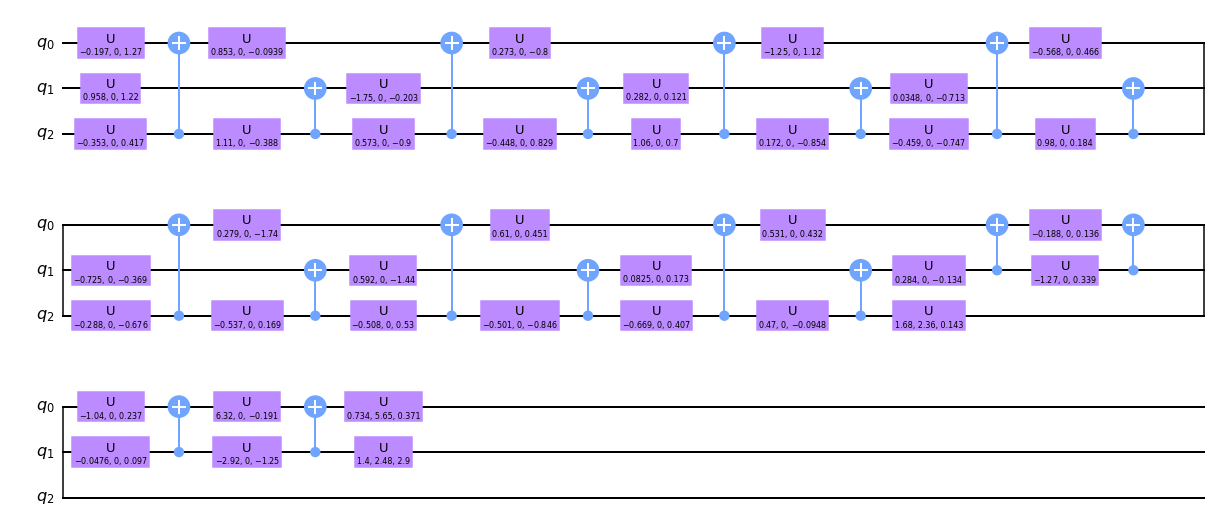

In [234]:
dec.draw('mpl')

In [220]:
def pad_decomposition(dec, max_n_layers_dict):
    

IndentationError: expected an indented block (417632700.py, line 2)

In [221]:
j = 0
for i, qa, ca in dec.data:
    if i.name == 'cx' and qa[0].index == 3 and qa[1].index == 0:
        j += 1
print(j)

0


/tmp/ipykernel_446476/4118529247.py:3: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if i.name == 'cx' and qa[0].index == 3 and qa[1].index == 0:


In [228]:
j = 0
for i, qa, ca in dec.data:
    if i.name == 'cx' and qa[0].index == 2 and qa[1].index == 0:
        j += 1
print(j)

14


/tmp/ipykernel_446476/2826122544.py:3: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if i.name == 'cx' and qa[0].index == 2 and qa[1].index == 0:


In [227]:
j = 0
for i, qa, ca in dec.data:
    if i.name == 'cx' and qa[0].index == 1 and qa[1].index == 0:
        j += 1
print(j)

0


/tmp/ipykernel_446476/1250207631.py:3: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if i.name == 'cx' and qa[0].index == 1 and qa[1].index == 0:


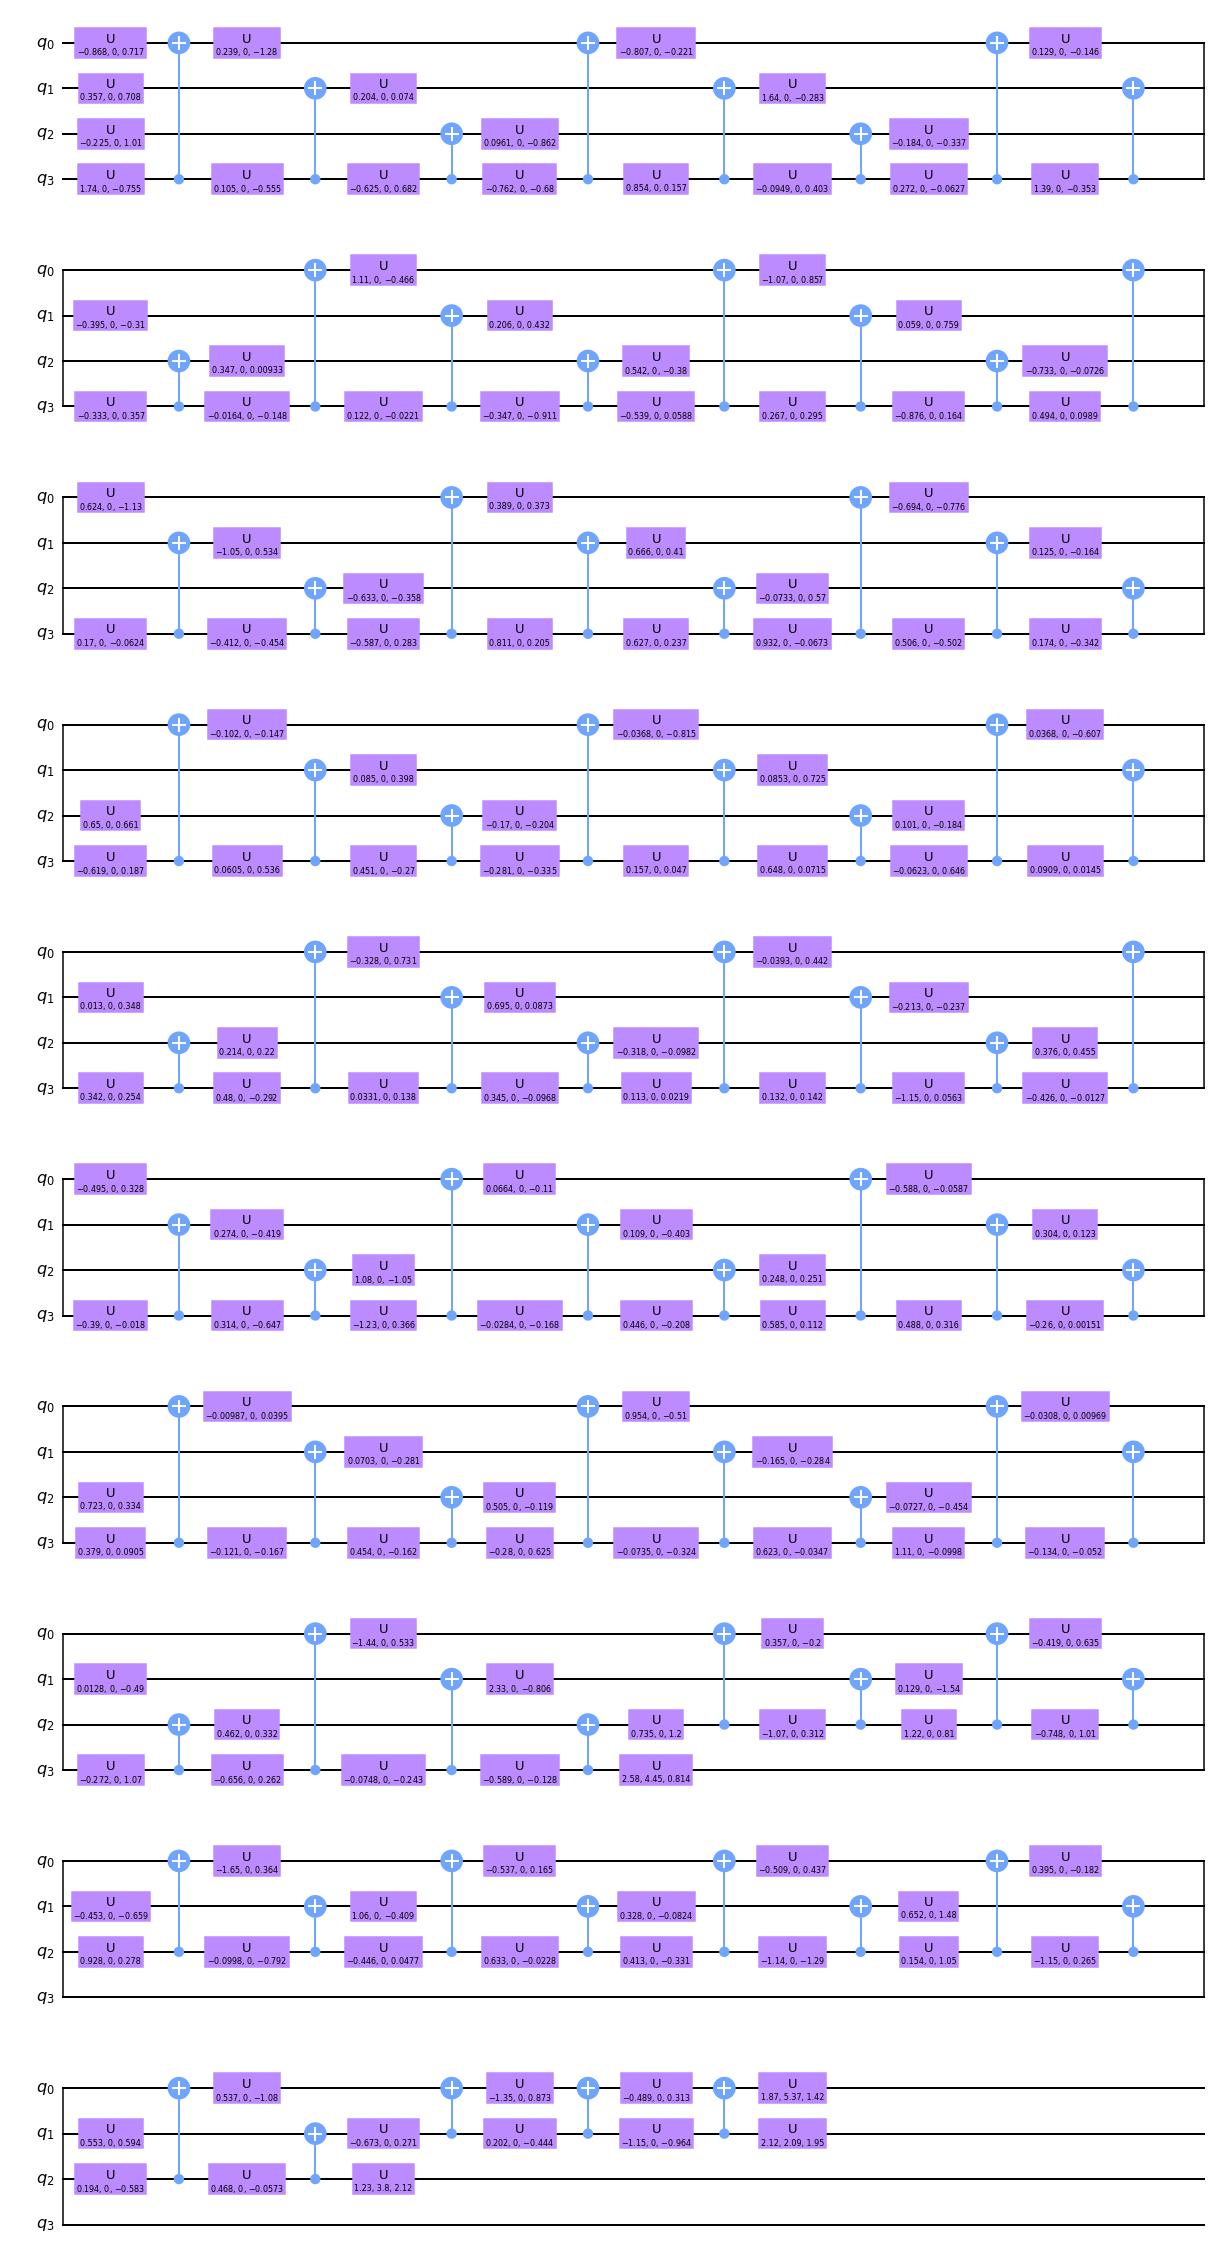

In [179]:
dec.draw('mpl')

In [136]:
dec.data[5]

(Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),
 [Qubit(QuantumRegister(3, 'q'), 2), Qubit(QuantumRegister(3, 'q'), 1)],
 [])

In [231]:
# fit_model(M_U, U[:1000], S[:1000])
# fit_model(M_u3, P_u3[:1000], S_u3[:1000])
# fit_model(M_su2_r1, P_su2_r1[:1000], S_su2_r1[:1000])
# fit_model(M_su2_r3, P_su2_r3[:1000], S_su2_r3[:1000])
# fit_model(M_su2_r5, P_su2_r5[:1000], S_su2_r5[:1000])
fit_model(M_qgan_r1, P_qgan_r1[:9000], S_qgan_r1[:9000, 12:18])

0epoch [00:00, ?epoch/s]

KeyboardInterrupt: 

In [137]:
from qiskit import transpile

In [146]:
dec.data[1]

(Instruction(name='u', num_qubits=1, num_clbits=0, params=[-0.14142000013500597, 0.0, 1.2586095912581103]),
 [Qubit(QuantumRegister(3, 'q'), 2)],
 [])

In [152]:
transpile(dec, optimization_level=0).data[5]

(Instruction(name='u', num_qubits=1, num_clbits=0, params=[-1.1698962366735917, 0.0, 0.2874665669741594]),
 [Qubit(QuantumRegister(3, 'q'), 2)],
 [])

In [246]:
np.mean(np.abs(S_qgan_r1[:9000, 6:12] / (M_qgan_r1(P_qgan_r1[:9000]) - S_qgan_r1[:9000, 6:12])))

0.86223733

In [230]:
np.mean(np.abs(M_qgan_r1(P_qgan_r1[9000:]) - S_qgan_r1[9000:, 6:12]))

0.0074150283

In [141]:
M_qgan_r1.evaluate(P_qgan_r1[9000:], S_qgan_r1[9000:])

32/32 [==============================] - 0s 705us/step - loss: 0.1875


0.18747040629386902

In [25]:
M_U.evaluate(U[1000:], S[1000:])

32/32 [==============================] - 0s 760us/step - loss: 0.7750


0.7749509215354919

In [26]:
M_u3.evaluate(P_u3[1000:], S_u3[1000:])

32/32 [==============================] - 0s 788us/step - loss: 0.0091


0.00905604287981987

In [22]:
M_su2_r1.evaluate(P_su2_r1[1500:], S_su2_r1[1500:])

16/16 [==============================] - 0s 838us/step - loss: 0.4985


0.498460590839386

In [23]:
M_su2_r1(P_su2_r1[1000:])

<tf.Tensor: shape=(1000, 77), dtype=float32, numpy=
array([[ 0.40561682, -0.5833351 ,  1.462363  , ...,  1.7578338 ,
        -0.0541765 ,  5.1535625 ],
       [ 0.10553051, -0.12836169, -0.55338275, ...,  2.6183836 ,
         3.187192  ,  5.843088  ],
       [-1.8602557 ,  1.3349323 , -1.6727644 , ...,  2.5816119 ,
         3.393566  ,  5.6846147 ],
       ...,
       [ 1.7482727 ,  0.1594912 ,  2.0356028 , ...,  2.1066566 ,
         3.0336943 ,  3.0103388 ],
       [ 0.65115047, -0.42789215,  1.1007344 , ...,  1.462944  ,
         4.8524547 ,  2.4038754 ],
       [ 3.3296626 , -0.9847869 ,  0.7606754 , ...,  1.923473  ,
         1.5279793 ,  0.67348194]], dtype=float32)>

In [24]:
S_su2_r1[1000:]

array([[ 0.51761642, -0.31085361,  1.38800959, ...,  1.73307508,
         0.06120095,  5.12601705],
       [ 0.07012392, -0.04523302, -0.68379983, ...,  2.54307614,
         3.28228861,  5.85481318],
       [-1.98255633,  1.43987564, -1.55471257, ...,  2.54307614,
         3.28228861,  5.85481318],
       ...,
       [ 0.63780761,  1.10381443,  1.43446156, ...,  0.28152419,
         1.64091692,  4.89968147],
       [-1.63561553,  1.64568379,  1.34569969, ...,  2.12566089,
         1.96039521,  1.99318269],
       [ 0.51303631,  1.23371825, -1.00013987, ...,  0.63785004,
         0.26973711,  5.964636  ]])

In [28]:
P_su2_r1

array([[4.59242415, 2.05669436, 5.42100116, ..., 3.59989622, 0.32708174,
        1.79876923],
       [1.10252744, 4.09873755, 3.16629851, ..., 5.25699563, 1.45141276,
        2.60401637],
       [4.33103884, 3.4200501 , 4.32479707, ..., 0.38866639, 0.38252062,
        1.62844539],
       ...,
       [0.40807108, 3.53577448, 3.86689541, ..., 0.31302303, 1.80692134,
        1.52812382],
       [0.84137164, 5.06192894, 5.12919457, ..., 6.26792152, 5.06125163,
        5.05885646],
       [0.80546741, 4.96799975, 2.67471968, ..., 6.14791765, 3.06144979,
        2.36208747]])